<a href="https://colab.research.google.com/github/RaoSiddhant/SIT796_RL/blob/main/Task_2_2_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Before we move to our environment, which we used in the practical(Our 10x10 maze problem), let us first try to understand what happens for a k arm bandit problem if we
#NOTE: THIS IS NOT ON OUR MAZE ENVIRONMENT BUT JUST TO UNDERSTAND THE CONCEPT. WE WILL TRY THIS ON THE MAZE PROBLEM LATER
#1- Vary Epsilon Values
#2- Optimistic vs Realistic Intitialization

#Later on our 10x10 Maze problem, we check the performance variation on the basis of alpha and gamma values for epsilon greedy or epsilon=0 case

#This is important to cover our core concepts and understand the plots we get according to our results
#Our main motive first is to understand the evaluation results we get

#First we import relevant modules 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
%matplotlib inline

#Let us first create a class so that we can vary epsilon values and we call this class later for each case we cover

class eps_bandit:
    
    def __init__(self, k, eps, iters, mu='random'):
        self.k = k # Number of arms
        self.eps = eps # Search probability
        self.iters = iters # Number of iterations
        self.n = 0 # Step count
        self.k_n = np.zeros(k) # Step count for each arm
        self.mean_reward = 0 # Total mean reward
        self.reward = np.zeros(iters)
        self.k_reward = np.zeros(k) # Mean reward for each arm
        
        if type(mu) == list or type(mu).__module__ == np.__name__:
            self.mu = np.array(mu) # User-defined averages
        elif mu == 'random':
            self.mu = np.random.normal(0, 1, k) # Draw means from probability distribution. In our maze problem, we keep this to a uniform distribution
        elif mu == 'sequence':
            self.mu = np.linspace(0, k-1, k) # Increase the mean for each arm by one
        
    def pull(self):
        p = np.random.rand() # Generate random number
        if self.eps == 0 and self.n == 0:
            a = np.random.choice(self.k)
        elif p < self.eps:
            a = np.random.choice(self.k) # Randomly select an action
        else:
            a = np.argmax(self.k_reward) # Take greedy action
            
        reward = np.random.normal(self.mu[a], 1)
        
        # Update counts
        self.n += 1
        self.k_n[a] += 1
        
        # Update total
        self.mean_reward = self.mean_reward + (
            reward - self.mean_reward) / self.n
        
        # Update results for a_k
        self.k_reward[a] = self.k_reward[a] + (
            reward - self.k_reward[a]) / self.k_n[a]
        
    def run(self):
        for i in range(self.iters):
            self.pull()
            self.reward[i] = self.mean_reward
            
    def reset(self):
        # Resets results while keeping settings
        self.n = 0
        self.k_n = np.zeros(k)
        self.mean_reward = 0
        self.reward = np.zeros(iters)
        self.k_reward = np.zeros(k)

class eps_decay_bandit:
    def __init__(self, k, iters, mu='random'):
        self.k = k # Number of arms
        self.iters = iters # Number of iterations
        self.n = 0 # Step count
        self.k_n = np.zeros(k) # Step count for each arm
        self.mean_reward = 0 # Total mean reward
        self.reward = np.zeros(iters)
        self.k_reward = np.zeros(k) # Mean reward for each arm
        
        if type(mu) == list or type(mu).__module__ == np.__name__:
            self.mu = np.array(mu) # User-defined averages
        elif mu == 'random':
            self.mu = np.random.normal(0, 1, k) # Draw means from probability distribution. In our maze problem, we keep this to a uniform distribution
        elif mu == 'sequence':
            self.mu = np.linspace(0, k-1, k) # Increase the mean for each arm by one
        
    def __init__(self, k, iters, mu='random'):
        self.k = k  # Number of arms
        self.iters = iters # Number of iterations
        self.n = 0 # Step count
        self.k_n = np.zeros(k) # Step count for each arm
        self.mean_reward = 0 # Total mean reward
        self.reward = np.zeros(iters)
        self.k_reward = np.zeros(k) # Mean reward for each arm
        
        if type(mu) == list or type(mu).__module__ == np.__name__:
            self.mu = np.array(mu) # User-defined averages
        elif mu == 'random':
            self.mu = np.random.normal(0, 1, k) # Draw means from probability distribution
        elif mu == 'sequence':
            self.mu = np.linspace(0, k-1, k) # Increase the mean for each arm by one
        
    def pull(self):
        # Generate random number
        p = np.random.rand()
        if p < 1 / (1 + self.n / self.k):
            # Randomly select an action
            a = np.random.choice(self.k)
        else:
            # Take greedy action
            a = np.argmax(self.k_reward)
            
        reward = np.random.normal(self.mu[a], 1)
        
        # Update counts
        self.n += 1
        self.k_n[a] += 1
        
        # Update total
        self.mean_reward = self.mean_reward + (
            reward - self.mean_reward) / self.n
        
        # Update results for a_k
        self.k_reward[a] = self.k_reward[a] + (
            reward - self.k_reward[a]) / self.k_n[a]
        
    def run(self):
        for i in range(self.iters):
            self.pull()
            self.reward[i] = self.mean_reward
            
    def reset(self):
        # Resets results while keeping settings
        self.n = 0
        self.k_n = np.zeros(k)
        self.mean_reward = 0
        self.reward = np.zeros(iters)
        self.k_reward = np.zeros(k)

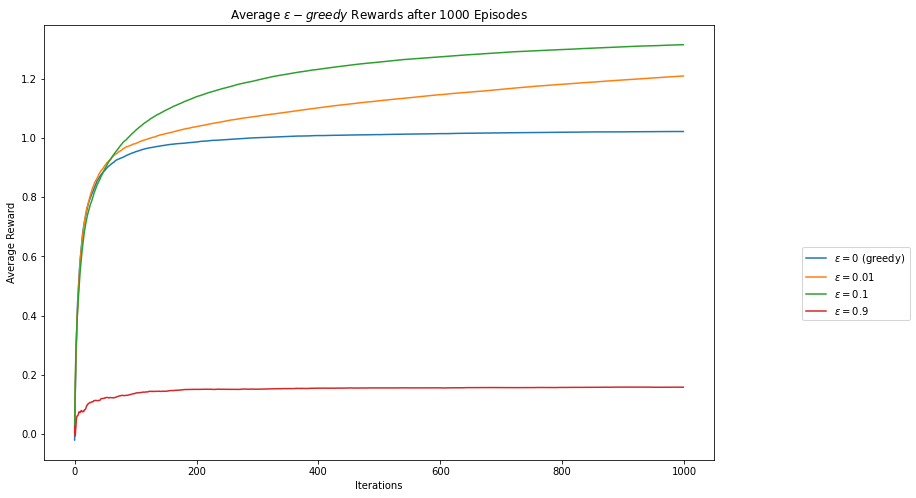

In [ ]:
# CASE 1- If we vary the epsilon values in our case
# We keep epsilon values to 0 (Full greedy, no exploration), 0.01,0.1 and 0.9(High exploration)
k = 10
iters = 1000

eps_0_rewards = np.zeros(iters)
eps_01_rewards = np.zeros(iters)
eps_1_rewards = np.zeros(iters)
eps_9_rewards = np.zeros(iters)

episodes = 1000
# Run experiments
for i in range(episodes):
    # Initialize bandits
    eps_0 = eps_bandit(k, 0, iters)
    eps_01 = eps_bandit(k, 0.01, iters, eps_0.mu.copy())
    eps_1 = eps_bandit(k, 0.1, iters, eps_0.mu.copy())
    eps_9 = eps_bandit(k, 0.9, iters, eps_0.mu.copy())
    
    # Run experiments
    eps_0.run()
    eps_01.run()
    eps_1.run()
    eps_9.run()
    # Update long-term averages
    eps_0_rewards = eps_0_rewards + (
        eps_0.reward - eps_0_rewards) / (i + 1)
    eps_01_rewards = eps_01_rewards + (
        eps_01.reward - eps_01_rewards) / (i + 1)
    eps_1_rewards = eps_1_rewards + (
        eps_1.reward - eps_1_rewards) / (i + 1)
    eps_9_rewards = eps_9_rewards + (
        eps_9.reward - eps_9_rewards) / (i + 1)
    

plt.figure(figsize=(12,8))
plt.plot(eps_0_rewards, label="$\epsilon=0$ (greedy)")
plt.plot(eps_01_rewards, label="$\epsilon=0.01$")
plt.plot(eps_1_rewards, label="$\epsilon=0.1$")
plt.plot(eps_9_rewards, label="$\epsilon=0.9$")
plt.legend(bbox_to_anchor=(1.3, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Average $\epsilon-greedy$ Rewards after " + str(episodes) 
    + " Episodes")
plt.show()

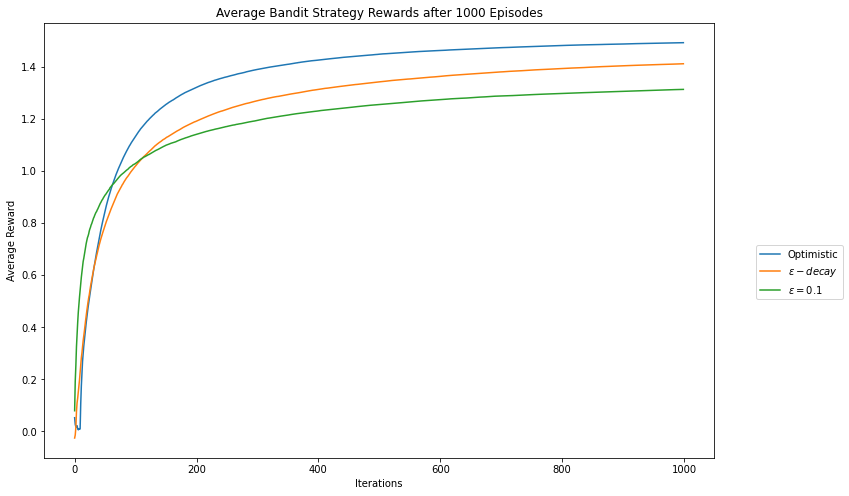

In [ ]:
# Case 2-We check Optimistic vs Realistic Initialization performance here
#The decay and the epsilon=0.1 are realistic initialization since we start wth 0 in both those cases 
k = 10
iters = 1000
oiv_rewards = np.zeros(iters)
eps_decay_rewards = np.zeros(iters)
eps_1_rewards = np.zeros(iters)
# Select initial values
oiv_init = np.repeat(5., k) # We keep initial optimistic values here. The previous values were kept to 0
episodes = 1000
# Run experiments
for i in range(episodes):
    # Initialize bandits
    oiv_bandit = eps_bandit(k, 0, iters)
    oiv_bandit.k_reward = oiv_init.copy()
    oiv_bandit.k_n = np.ones(k)
    eps_decay = eps_decay_bandit(k, iters, oiv_bandit.mu.copy())
    eps_1 = eps_bandit(k, 0.1, iters, oiv_bandit.mu.copy())
    
    # Run experiments
    oiv_bandit.run()
    eps_decay.run()
    eps_1.run()
    
    # Update long-term averages
    oiv_rewards = oiv_rewards + (
        oiv_bandit.reward - oiv_rewards) / (i + 1)
    eps_decay_rewards = eps_decay_rewards + (
        eps_decay.reward - eps_decay_rewards) / (i + 1)
    eps_1_rewards = eps_1_rewards + (
        eps_1.reward - eps_1_rewards) / (i + 1)
    
plt.figure(figsize=(12,8))
plt.plot(oiv_rewards, label="Optimistic")
plt.plot(eps_decay_rewards, label="$\epsilon-decay$")
plt.plot(eps_1_rewards, label="$\epsilon=0.1$")
plt.legend(bbox_to_anchor=(1.2, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Average Bandit Strategy Rewards after " + 
    str(episodes) + " Episodes")
plt.show()

In [ ]:
#Now we move to the 10x10 maze problem which was covered in our practical
#The code shown below is the setup for the maze environment and we keep this part same as our practical code
#On the first run, it will ask for a restart runtime and we may have to run it once more

# install required system dependencies
!apt-get install -y xvfb x11-utils  
!apt-get install x11-utils > /dev/null 2>&1
!pip install PyOpenGL==3.1.* \
            PyOpenGL-accelerate==3.1.* \
            gym[box2d]==0.17.* \
!pip install pyglet
!pip install ffmpeg
! pip install pyvirtualdisplay
!pip install Image
!pip install gym-maze-trustycoder83

!mkdir ./vid
!rm ./vid/*.*


#Importing Relevant Packages
import sys
import numpy as np
import gym
import gym_maze
from pyvirtualdisplay import Display
from gym.wrappers.monitoring import video_recorder

#We start here
d = Display()
d.start()

# Recording filename
video_name = "./vid/Practical_2.mp4"

# Setup the environment for the maze
env = gym.make("maze-sample-10x10-v0")

# Setup the video
vid = None
vid = video_recorder.VideoRecorder(env,video_name)

# env = gym.wrappers.Monitor(env,'./vid',force=True)
current_state = env.reset()



Reading package lists... Done
Building dependency tree       
Reading state information... Done
x11-utils is already the newest version (7.7+3build1).
xvfb is already the newest version (2:1.19.6-1ubuntu4.8).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.
ERROR: Invalid requirement: '!pip'
mkdir: cannot create directory ‘./vid’: File exists
pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


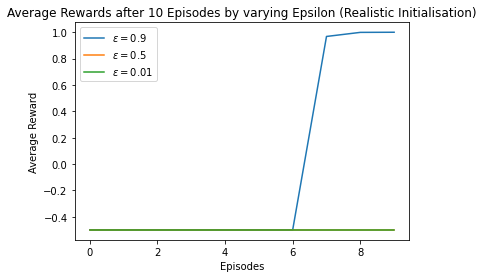

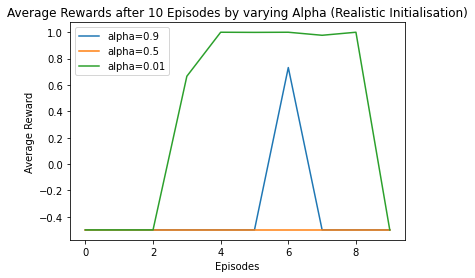

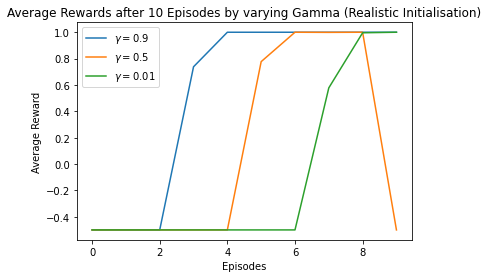

In [ ]:
# EVALUATION METRIC Average Reward vs episodes for varying epsilon, alpha and gamma values for Realistic Initialization 
import matplotlib.pyplot as plt

states_dic = {} #dictionary to keep the states/coordinates of the Q table
count = 0
for i in range(10):
    for j in range(10):
        states_dic[i, j] = count
        count+=1
       
n_actions = env.action_space.n
 
# Initialize the Q-table to 0
Q_table = np.zeros((len(states_dic),n_actions))

# Number of episode we will run
n_episodes = 10

# Maximum of iteration per episode
max_iter_episode = 500

# We define this function to use the  

def epsilon_func(epsilon, alpha, gamma):
  current_state = env.reset()
  rewards_per_episode = list()
  selection_per_episode = list()

# Iterate over episodes
  for e in range(n_episodes):
    
    # We are not done yet
      done = False
    
    # Sum the rewards that the agent gets from the environment
      total_episode_reward = 0
      
      for i in range(max_iter_episode): 
          env.unwrapped.render()
          vid.capture_frame()
          current_coordinate_x = int(current_state[0])
          current_coordinate_y = int(current_state[1])
          current_Q_table_coordinates = states_dic[current_coordinate_x, current_coordinate_y]
          # THIS IS WHERE WE CHOOSE EXPLOITATION VS EXPLORATION
          if np.random.rand() < epsilon:
            action = env.action_space.sample()
          else:
            action = int(np.argmax(Q_table[current_Q_table_coordinates]))

          next_state, reward, done, _ = env.step(action)
          

          next_coordinate_x = int(next_state[0]) #get coordinates to be used in dictionary
          next_coordinate_y = int(next_state[1]) #get coordinates to be used in dictionary


        # Update our Q-table using the Q-learning iteration
        # WE HAVE MODIFIED THIS Q VALUE TRACKING FORMULA FROM THE ONE WHICH WE HAD IN THE PRACTICAL 
          next_Q_table_coordinates = states_dic[next_coordinate_x, next_coordinate_y]
          Q_table[next_Q_table_coordinates, action] = Q_table[current_Q_table_coordinates, action] +alpha*(reward - gamma*(Q_table[current_Q_table_coordinates,action]))
    
          total_episode_reward = total_episode_reward + reward
          total_episode_selection = ((reward-Q_table[current_Q_table_coordinates,action])/Q_table[current_Q_table_coordinates,action]) if Q_table[current_Q_table_coordinates,action] !=0 else 0
      
      # If the episode is finished, we leave the for loop
          if done:
              break
          current_state = next_state

    
    
      rewards_per_episode.append(total_episode_reward)
      selection_per_episode.append(total_episode_selection)
  
  plt.plot(rewards_per_episode)
  #plt.plot(selection_per_episode)

epsilon_func(0.9, 0.5, 0.5)
epsilon_func(0.5, 0.5, 0.5)
epsilon_func(0.01, 0.5, 0.5)
plt.legend(['$\epsilon=0.9$','$\epsilon=0.5$','$\epsilon=0.01$'])
plt.xlabel("Episodes")
plt.ylabel("Average Reward")
plt.title("Average Rewards after 10 Episodes by varying Epsilon (Realistic Initialisation)")
plt.show()

epsilon_func(0.9, 0.9, 0.5)
epsilon_func(0.9, 0.5, 0.5)
epsilon_func(0.9, 0.1, 0.5)
plt.legend(['alpha=0.9','alpha=0.5','alpha=0.01'])
plt.xlabel("Episodes")
plt.ylabel("Average Reward")
plt.title("Average Rewards after 10 Episodes by varying Alpha (Realistic Initialisation)")
plt.show()

epsilon_func(0.9, 0.5, 0.9)
epsilon_func(0.9, 0.5, 0.5)
epsilon_func(0.9, 0.5, 0.1)
plt.legend(['$\gamma=0.9$','$\gamma=0.5$','$\gamma=0.01$'])
plt.xlabel("Episodes")
plt.ylabel("Average Reward")
plt.title("Average Rewards after 10 Episodes by varying Gamma (Realistic Initialisation)")
plt.show()

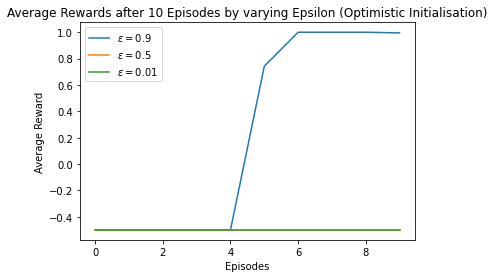

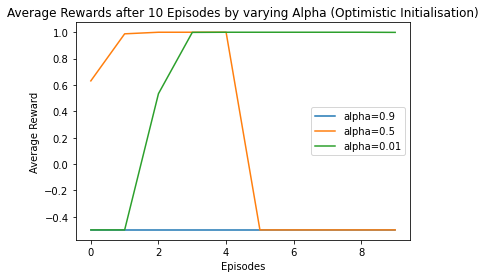

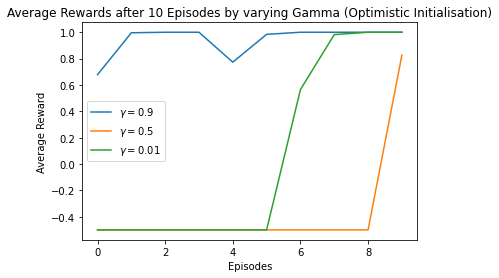

In [ ]:
# INITIALIZE THE Q TABLE TO ONES AS PART OF OPTIMISTIC INITIALIZATION
# For Average Reward vs Episodes

states_dic = {} #dictionary to keep the states/coordinates of the Q table
count = 0
for i in range(10):
    for j in range(10):
        states_dic[i, j] = count
        count+=1
       
n_actions = env.action_space.n
 
# INITIALIZE THE Q TABLE TO ONES AS PART OF OPTIMISTIC INITIALIZATION. We initialize to all ones
Q_table = np.ones((len(states_dic),n_actions))

# Number of episode we will run
n_episodes = 10

# Maximum of iteration per episode
max_iter_episode = 500

# We define this function to use the  

def epsilon_func(epsilon, alpha, gamma):
  current_state = env.reset()
  rewards_per_episode = list()
  selection_per_episode = list()

# Iterate over episodes
  for e in range(n_episodes):
    
    # We are not done yet
      done = False
    
    # Sum the rewards that the agent gets from the environment
      total_episode_reward = 0
      
      for i in range(max_iter_episode): 
          env.unwrapped.render()
          vid.capture_frame()
          current_coordinate_x = int(current_state[0])
          current_coordinate_y = int(current_state[1])
          current_Q_table_coordinates = states_dic[current_coordinate_x, current_coordinate_y]
          
          # THIS IS WHERE WE CHOOSE EXPLOITATION VS EXPLORATION
          if np.random.rand() < epsilon:
            action = env.action_space.sample()
          else:
            action = int(np.argmax(Q_table[current_Q_table_coordinates]))

          next_state, reward, done, _ = env.step(action)
          

          next_coordinate_x = int(next_state[0]) #get coordinates to be used in dictionary
          next_coordinate_y = int(next_state[1]) #get coordinates to be used in dictionary


        # Update our Q-table using the Q-learning iteration
        # WE HAVE MODIFIED THIS Q VALUE TRACKING FORMULA FROM THE ONE WHICH WE HAD IN THE PRACTICAL
          next_Q_table_coordinates = states_dic[next_coordinate_x, next_coordinate_y]
          Q_table[next_Q_table_coordinates, action] = Q_table[current_Q_table_coordinates, action] +alpha*(reward - gamma*(Q_table[current_Q_table_coordinates,action]))
    
          total_episode_reward = total_episode_reward + reward
          total_episode_selection = np.amax(Q_table, 1)
        # If the episode is finished, we leave the for loop
          if done:
              break
          current_state = next_state

    
    
      rewards_per_episode.append(total_episode_reward)
  selection_per_episode=np.argmax(Q_table,axis=1)
  
  plt.plot(rewards_per_episode)
  #plt.plot(selection_per_episode)

epsilon_func(0.9, 0.5, 0.5)
epsilon_func(0.5, 0.5, 0.5)
epsilon_func(0.01, 0.5, 0.5)
plt.legend(['$\epsilon=0.9$','$\epsilon=0.5$','$\epsilon=0.01$'])
plt.xlabel("Episodes")
plt.ylabel("Average Reward")
plt.title("Average Rewards after 10 Episodes by varying Epsilon (Optimistic Initialisation)")
plt.show()

epsilon_func(0.9, 0.9, 0.5)
epsilon_func(0.9, 0.5, 0.5)
epsilon_func(0.9, 0.1, 0.5)
plt.legend(['alpha=0.9','alpha=0.5','alpha=0.01'])
plt.xlabel("Episodes")
plt.ylabel("Average Reward")
plt.title("Average Rewards after 10 Episodes by varying Alpha (Optimistic Initialisation)")
plt.show()

epsilon_func(0.9, 0.5, 0.9)
epsilon_func(0.9, 0.5, 0.5)
epsilon_func(0.9, 0.5, 0.1)
plt.legend(['$\gamma=0.9$','$\gamma=0.5$','$\gamma=0.01$'])
plt.xlabel("Episodes")
plt.ylabel("Average Reward")
plt.title("Average Rewards after 10 Episodes by varying Gamma (Optimistic Initialisation)")
plt.show()